### Excercise 13

Repeat the previous exercise with the K-Nearest Neighbor and Decision Tree clas-sification models. You may use scikit-learn implementations: KNNand DT. For KNN check differentvalues of parameter n_neighbors- the number of considered neighbors. For DT check differentvalues of parameter max_depth- the maximum depth of a tree.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn import metrics
from patsy import dmatrices

%matplotlib inline

In [2]:
df = pd.read_csv('Credit.csv')
df['IncomeGreaterThan50'] = np.where(df['Income'] > 50.0, 'Yes', 'No')
df = df.astype({'IncomeGreaterThan50': 'category'})
df = pd.get_dummies(df, columns=['IncomeGreaterThan50'])

msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]


### kNN with different # of neighbours
kNN having different number of neighbours

a) income greater than $50

In [3]:
from sklearn import neighbors
from sklearn import metrics


knn_results_1 = []

for n_neighbors in range(1, 100):
    equation = 'IncomeGreaterThan50_Yes ~ Rating + Balance + Limit'

    y, X = dmatrices(equation, data=train, return_type='dataframe') 

    predictor = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y.values.ravel())

    y_true, X = dmatrices(equation, data=test, return_type='dataframe') 
    y_pred = predictor.predict(X)
    knn_results_1.append([n_neighbors, metrics.accuracy_score(y_true, y_pred)])
    

[1, 0.9324324324324325]

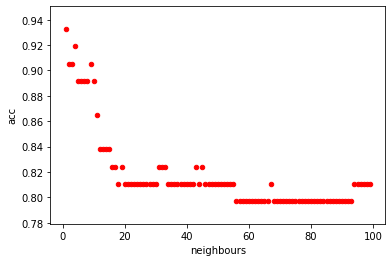

In [4]:
pd.DataFrame(knn_results_1, columns=['neighbours', 'acc']).plot(kind='scatter',x='neighbours',y='acc',color='red')
max(knn_results_1, key=lambda e:e[1])

b) # of cards

In [6]:
from sklearn import tree
from sklearn import metrics

# b) # of cards

knn_results_2 = []

for n_neighbors in range(1, 326):
    equation = 'Cards ~ Balance + Rating + Income + Limit'

    y, X = dmatrices(equation, data=train, return_type='dataframe') 

    predictor = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y.values.ravel())

    y_true, X = dmatrices(equation, data=test, return_type='dataframe') 
    y_pred = predictor.predict(X)
    knn_results_2.append([n_neighbors, metrics.accuracy_score(y_true, y_pred)])
    

[131, 0.36486486486486486]

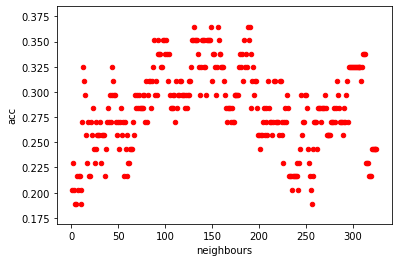

In [7]:
pd.DataFrame(knn_results_2, columns=['neighbours', 'acc']).plot(kind='scatter',x='neighbours',y='acc',color='red')
max(knn_results_2, key=lambda e:e[1])

### Descision Tree with different max. depth

a) income greater than $50

In [15]:
from sklearn import tree
from sklearn import metrics


tree_results_1 = []

for max_depth in range(1, 100):
    equation = 'IncomeGreaterThan50_Yes ~ Rating + Balance + Limit'

    y, X = dmatrices(equation, data=train, return_type='dataframe') 

    predictor = tree.DecisionTreeClassifier(max_depth=max_depth).fit(X, y.values.ravel())

    y_true, X = dmatrices(equation, data=test, return_type='dataframe') 
    y_pred = predictor.predict(X)
    tree_results_1.append([max_depth, metrics.accuracy_score(y_true, y_pred)])
    

[19, 0.8783783783783784]

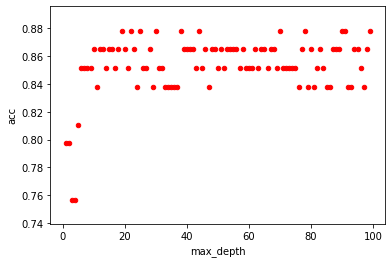

In [17]:
pd.DataFrame(tree_results_1, columns=['max_depth', 'acc']).plot(kind='scatter',x='max_depth',y='acc',color='red')
max(tree_results_1, key=lambda e:e[1])

b) # of cards

In [19]:
from sklearn import tree
from sklearn import metrics


tree_results_2 = []

for max_depth in range(1, 100):
    equation = 'Cards ~ Balance + Rating + Income + Limit'

    y, X = dmatrices(equation, data=train, return_type='dataframe') 

    predictor = tree.DecisionTreeClassifier(max_depth=max_depth).fit(X, y.values.ravel())

    y_true, X = dmatrices(equation, data=test, return_type='dataframe') 
    y_pred = predictor.predict(X)
    tree_results_2.append([max_depth, metrics.accuracy_score(y_true, y_pred)])
    

[3, 0.36486486486486486]

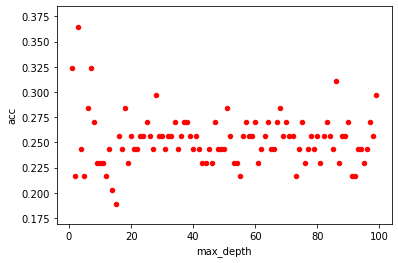

In [20]:
pd.DataFrame(tree_results_2, columns=['max_depth', 'acc']).plot(kind='scatter',x='max_depth',y='acc',color='red')
max(tree_results_2, key=lambda e:e[1])